In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 1
b = 2
c = -0.5

sx = 0.7
sy = 1.4

x0 = 2
y0 = 0

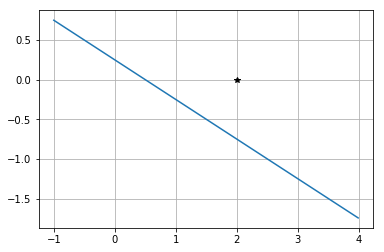

In [3]:
x = np.arange(-1,4, 0.01)
y = (-a*x-c)/b
plt.plot(x, y)

plt.plot(x0, y0, 'k*')
plt.grid()

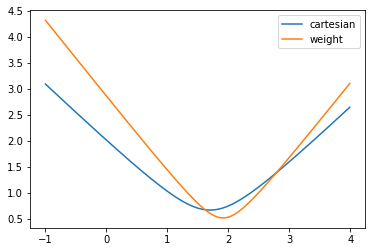

In [4]:
d_c = np.sqrt((x-x0)**2 + (y-y0)**2)

d_d = np.sqrt(np.square(x-x0)/sx**2 + np.square(y-y0)/sy**2)

plt.plot(x,d_c,label='cartesian')
plt.plot(x,d_d,label='weight')

plt.legend(loc='best')

In [5]:
print x[np.argmin(d_c)]
print x[np.argmin(d_d)]

1.7000000000000024
1.9100000000000028


In [6]:
print np.min(d_c)
print np.abs(a*x0 + b*y0 + c)/np.sqrt(a**2 + b**2)

0.6708203932499369
0.6708203932499369


In [7]:
print np.min(d_d)
print np.abs(a*x0 + b*y0 + c)/np.sqrt((sx*a)**2 + (sy*b)**2)

0.5197256929557816
0.5197191965064278


In [8]:
xc = 1
yc = 1
R = 1 + np.cos(np.pi/3)
rh = 1

a = (2-r**2)/2

s = a*xc

In [9]:
def b0(bc, bm, f):
    exponent = np.log(bm/bc)/np.log(f) -1
    return bm / np.power(f, exponent)

In [22]:
bc = np.arange(0.1, 100, 1.2)
y = b0(bc, 60, 0.8)

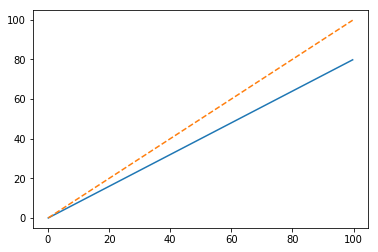

In [23]:
plt.plot(bc, y)
plt.plot(bc,bc, '--')

In [30]:
M = np.array([[54.62, -8.891],[-8.891, 6.3]])
np.linalg.eig(m)

(array([56.20403778,  4.71596222]), array([[ 0.98449726,  0.17539994],
        [-0.17539994,  0.98449726]]))

In [33]:
np.hypot(0.98449726,  0.17539994)

0.9999999969497556

In [27]:
1/(2*56.204)

0.00889616397409437

In [28]:
d = (m[0,0] - m[1,1])**2 + 4*m[0,1]**2
beta_c = 1/(m[0,0] + m[1,1] + np.sqrt(d))
print beta_c

0.008896157994819387


In [43]:
def inclination_Olmo(M):
    a = M[0,0]
    b = M[1,0]
    c = M[1,1]
    print "l_max = ", 0.5*(a + c + np.sqrt((a-c)**2 + 4*b**2))
    
    tn = (a-c)**2 + 4*b**2
    tn = a - c + np.sqrt(tn)
    zn = -2 * b
    
    norm = np.hypot(tn, zn)
    
    print "z: ", zn/norm
    print "t: ", tn/norm
    
    return [zn/tn, zn/norm, tn/norm]

In [44]:
def inclination_numpy(M):
    lam, v = np.linalg.eig(M)
    idx = np.argmax(lam)
    print lam[idx]
    tn = v[idx][1]
    zn = v[idx][0]
    print "z: ", zn
    print "t: ", tn
    return [zn/tn, zn, tn]    

In [45]:
inclination_Olmo(M)

l_max =  56.204037775764704
z:  0.17539993872941279
t:  0.9844972633246464


[0.1781619363136545, 0.17539993872941279, 0.9844972633246464]

In [46]:
inclination_numpy(M)

56.204037775764704
z:  0.9844972633246464
t:  0.17539993872941279


[5.612871192865224, 0.9844972633246464, 0.17539993872941279]

In [48]:
import os, glob, re
import numpy as np

In [60]:
f = '../_root/jobs_PU140_poiss/pp2RHad_PU140_M200/*tks_flat.root'

In [61]:
xsec_files = os.path.dirname(f) + '/xsec.txt'
fxsec = open(xsec_files)
err = []
xsec = []
for l in fxsec.readlines():
    out = re.search(r'[0-9]+.[0-9]+e-[0-9]+  [0-9]+.[0-9]+e-[0-9]+', l)
    out =  str(out.group(0))
    out = out.split('  ')
    xsec.append(float(out[0])*1e9)
    err.append(float(out[1])*1e9)
    
err2 = np.square(np.array(err))
xsec = np.array(xsec)

In [63]:
xsec = np.sum(xsec*err2/np.sum(err2))
err = 1./np.sqrt(np.sum(1./err2))

print xsec, ' +/- ', err

51.50220113893968  +/-  0.13648632242086225


In [26]:
command = 'more ' + os.path.dirname(f) + '/*.log' 
command += ' | grep "| sum                                                |"'
command += ' >> ' + os.path.dirname(f) + 'xsec.txt'
print command

more ../_root/jobs_PU140_poiss/pp2RHad_PU140_M500/*.log | grep "| sum                                                |" >> ../_root/jobs_PU140_poiss/pp2RHad_PU140_M500xsec.txt


In [27]:
os.system(command)

0

In [17]:
for f in log_files:
    for l in f.

/Users/olmo/cernbox/PID_timing_studies/plot_script


In [25]:
import subprocess
command
result = subprocess.check_output('more ' + log_files + ' | grep "| sum                                                |"')
result.stdout

OSError: [Errno 2] No such file or directory